# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

The tasks are to:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
house.head(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   

   LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
0          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1          Lvl    AllPub    ...            0    NaN    NaN         NaN   
2          Lvl    AllPub    ...            0    NaN    NaN         NaN   
3          Lvl    AllPub    ...            0    NaN    NaN         NaN   
4          Lvl    AllPub    ...            0    NaN    NaN         NaN   
5          Lvl    AllPub    ...            0    NaN  MnPrv        Shed   
6          Lvl    AllPub    ...            0    NaN    NaN         NaN   
7          Lvl    AllPub    ...            0    NaN    NaN        Shed   
8          Lvl    AllPub    ...            0    NaN    NaN         NaN   
9          Lvl    AllPub    ...            0    NaN    NaN         NaN   
10         Lvl    AllPub    ...            0    NaN    NaN         NaN   
11         Lvl    AllPub    ...            0    NaN    NaN         NaN   
12         Lvl    AllPub    ...            0    NaN    NaN         NaN   
13         Lvl    AllPub    ...            0    NaN    NaN         NaN   
14         Lvl    AllPub    ...            0    NaN   GdWo         NaN   

   MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        0      2   2008        WD         Normal     208500  
1        0      5   2007        WD         Normal     181500  
2        0      9   2008        WD         Normal     223500  
3        0      2   2006        WD        Abnorml     140000  
4        0     12   2008        WD         Normal     250000  
5      700     10   2009        WD         Normal     143000  
6        0      8   2007        WD         Normal     307000  
7      350     11   2009        WD         Normal     200000  
8        0      4   2008        WD        Abnorml     129900  
9        0      1   2008        WD         Normal     118000  
10       0      2   2008        WD         Normal     129500  
11       0      7   2006       New        Partial     345000  
12       0      9   2008        WD         Normal     144000  
13       0      8   2007       New        Partial     279500  
14       0      5   2008        WD         Normal     157000  

[15 rows x 81 columns]

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## Fill in the blanks first. MasVnrArea null values will be changed to 0 (because it is numerical), LotFrontage will be filled with the median value, all others with NA values will be replaced with 'None'

In [6]:
house['LotFrontage'].fillna(0., inplace=True)
house['MasVnrArea'].fillna(0., inplace=True)

In [7]:
house.fillna('None', inplace=True)

In [8]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

## Drop the following rows because they have too few data points / not relevant

In [9]:
house.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Id',], axis=1, inplace=True)

In [10]:
house.rename(columns={'1stFlrSF':'FirstFlrSF','2ndFlrSF':'SecondFlrSF','3SsnPorch':'SsnPorch'},inplace=True)
house['HouseStyle'].replace({'2Story':'Two', '1Story':'One', '1.5Fin':'OnehalfFin', '1.5Unf':'OnehalfUn', '2.5Unf':'TwohalfUn','2.5Fin':'TwohalfFin'},inplace=True)
house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir',
       u'Electrical', u'FirstFlrSF', u'SecondFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars',
   

## Replace house type numbers to a friendlier format

In [11]:
def housetype(num):
    housedict = {
        20: 'One_1946new',
        30: 'One_1945',
        40: 'One_attic',
        45: 'Onehalf_unfin',
        50: 'Onehalf_fin',
        60: 'Two_1946new',
        70: 'Two_1945old',
        75: 'Twohalf',
        80: 'Split_Level',
        85: 'Split_Foyer',
        90: 'Duplex',
       120: 'One_PUD',
       150: 'Onehalf_PUD',
       160: 'Two_PUD',
       180: 'MultiLevel_PUD',
       190: 'DualFamily'}
    return housedict[num]

#housetype(fixed['MSSubClass'][0])
house['Type'] = house['MSSubClass'].map(housetype)

In [12]:
house.drop('MSSubClass', axis=1, inplace=True)

## Going to remove all commercial properties

In [13]:
house.shape

(1460, 76)

In [14]:
house = house[house['MSZoning'] != 'C (all)']
house.groupby(['MSZoning']).size()

MSZoning
FV      65
RH      16
RL    1151
RM     218
dtype: int64

In [15]:
house.shape

(1450, 76)

## Sort by YrSold

In [16]:
house.sort_values(by='YrSold', ascending=True, inplace=True)

## Separate into fixed and renovatable features

In [17]:
fixed = house[['Type','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','MasVnrArea','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','FirstFlrSF','SecondFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SaleType','SaleCondition','SalePrice']]

In [18]:
renovatable = [x for x in house.columns if x not in fixed]
renovatable_df = house[[
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'SalePrice',
 'YrSold']]

### I realize that what can be considered 'fixed' is subjective. After all, you only need to have deeper pockets to be able to do extensive renovations on features that are normally considered fixed.

## Look out for more features to drop

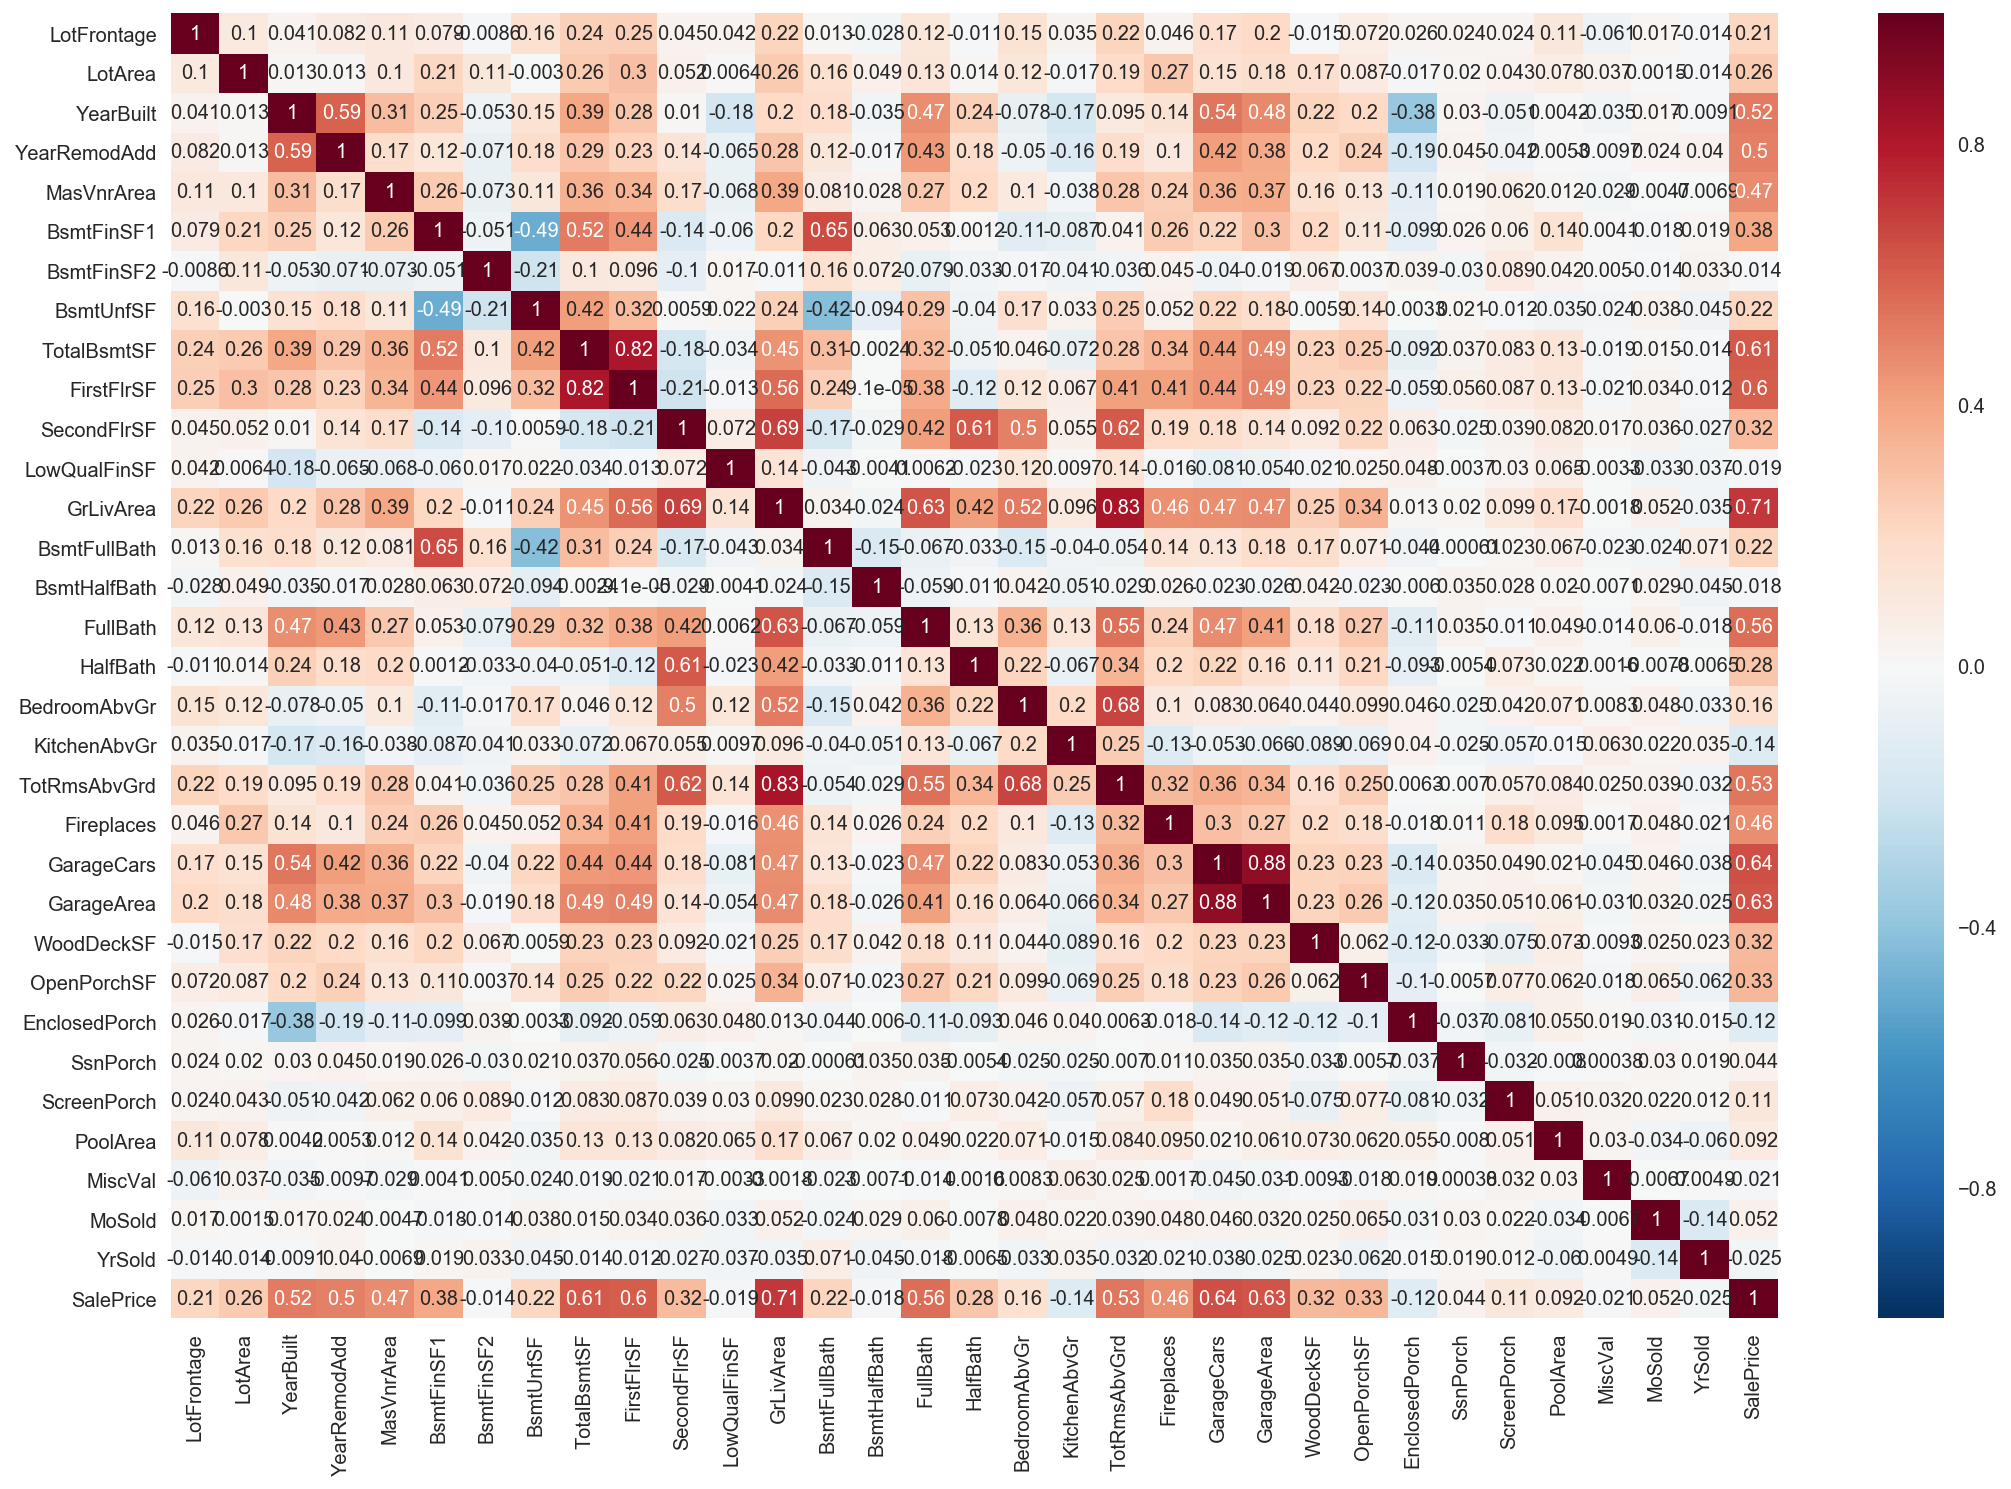

In [19]:
fig = plt.figure(figsize=(18,12))
fixed_corr = fixed.corr()
sns.heatmap(fixed_corr, annot=True)


## Going to drop GarageCars, GarageYrBlt, since they have high correlation with GarageArea and YearBuilt

In [20]:
fixed.drop('GarageCars', axis=1, inplace=True)
fixed.drop('GarageYrBlt', axis=1, inplace=True)

/Users/ezekielkuang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ezekielkuang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Use patsy to generate formula and train, test dataframes

In [21]:
f = 'SalePrice ~ '+' + '.join([c for c in fixed.columns if not c == 'SalePrice']) + "-1"
print f

SalePrice ~ Type + MSZoning + LotFrontage + LotArea + Street + LotShape + LandContour + Utilities + LotConfig + LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + YearBuilt + YearRemodAdd + MasVnrArea + Foundation + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Functional + Fireplaces + GarageType + GarageFinish + GarageArea + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + SsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + SaleType + SaleCondition-1


In [22]:
import patsy

formula = f

y, X = patsy.dmatrices(formula, data=fixed, return_type='dataframe')

In [23]:
X.shape

(1450, 148)

## Filter out for pre 2010 data as train set and post 2010 data as test

In [24]:
X_train = X[X['YrSold'] < 2010]
y_train = y[X['YrSold'] < 2010]
X_test = X[X['YrSold'] >= 2010]
y_test = y[X['YrSold'] >= 2010]

In [25]:
y_train.shape

(1278, 1)

In [26]:
y_test.shape

(172, 1)

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

Xs = ss.transform(X)

## Feature Selection. Sorted by chi2 score because for more categorical data

In [28]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(X_train, y_train)
skb_chi2.fit(X_train, y_train)

# examine results
kbest = pd.DataFrame([list(X_train.columns), list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('chi2 score', ascending=False)


/Users/ezekielkuang/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ezekielkuang/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [32]:
from sklearn.feature_selection import RFECV

rfe = RFECV(linreg2, step=3, cv=10)
rfe = rfe.fit(Xs_train, y_train)

output = pd.DataFrame({'features':X_train.columns})
output2 = pd.DataFrame({'rank':rfe.ranking_})
out_tot = pd.concat([output, output2], axis=1)
out_tot.sort_values(by='rank', ascending=True, inplace=True)


In [45]:
# comparing the sorted coefficients
print kbest.head(15)
print out_tot.head(15)
print lasso_coefs.head(15)

          feature f_classif   chi2 score
118       LotArea   3.22107  9.74737e+06
145       MiscVal   3.83892  6.70513e+06
127   SecondFlrSF   1.63368       415486
122    BsmtFinSF1   1.59208       359531
144      PoolArea  0.931339       341730
123    BsmtFinSF2  0.914711       316274
121    MasVnrArea   1.93024       263951
124     BsmtUnfSF   1.45888       253710
128  LowQualFinSF   1.04886       247970
142      SsnPorch     1.386       182205
129     GrLivArea   3.33239       175884
125   TotalBsmtSF   2.17367       156622
143   ScreenPorch   1.04894       130542
139    WoodDeckSF   1.37254       115761
126    FirstFlrSF   2.19791       109564
                    features  rank
129                GrLivArea     1
47   Neighborhood[T.NridgHt]     2
119                YearBuilt     2
126               FirstFlrSF     2
138               GarageArea     3
46   Neighborhood[T.NoRidge]     3
127              SecondFlrSF     3
120             YearRemodAdd     4
53   Neighborhood[T.StoneBr] 

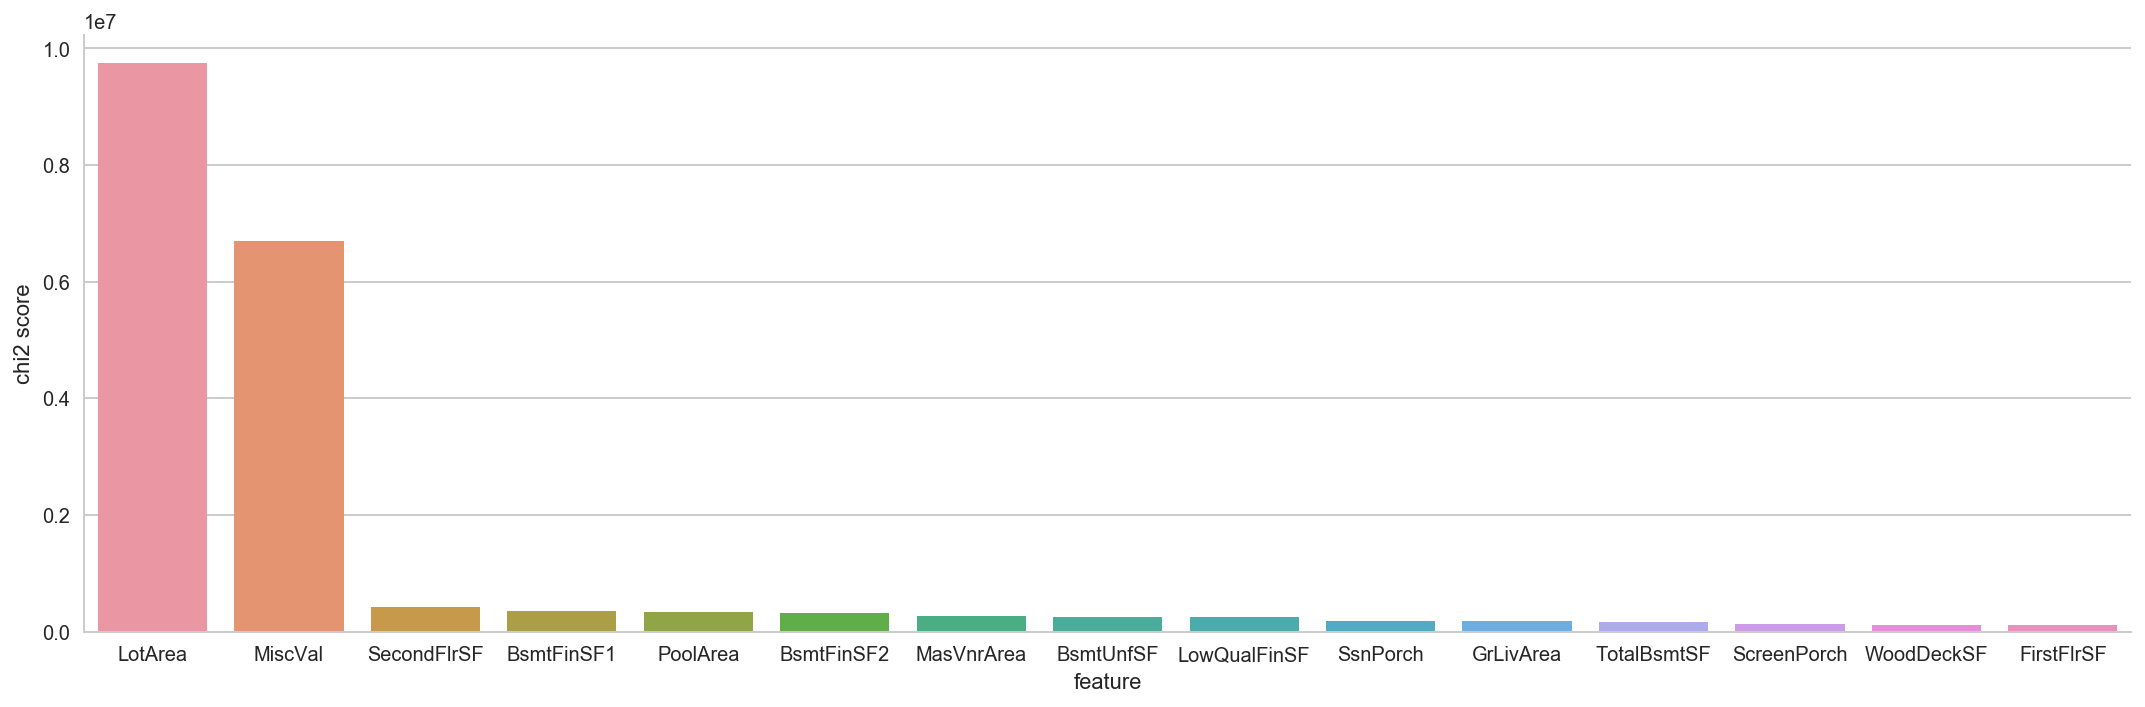

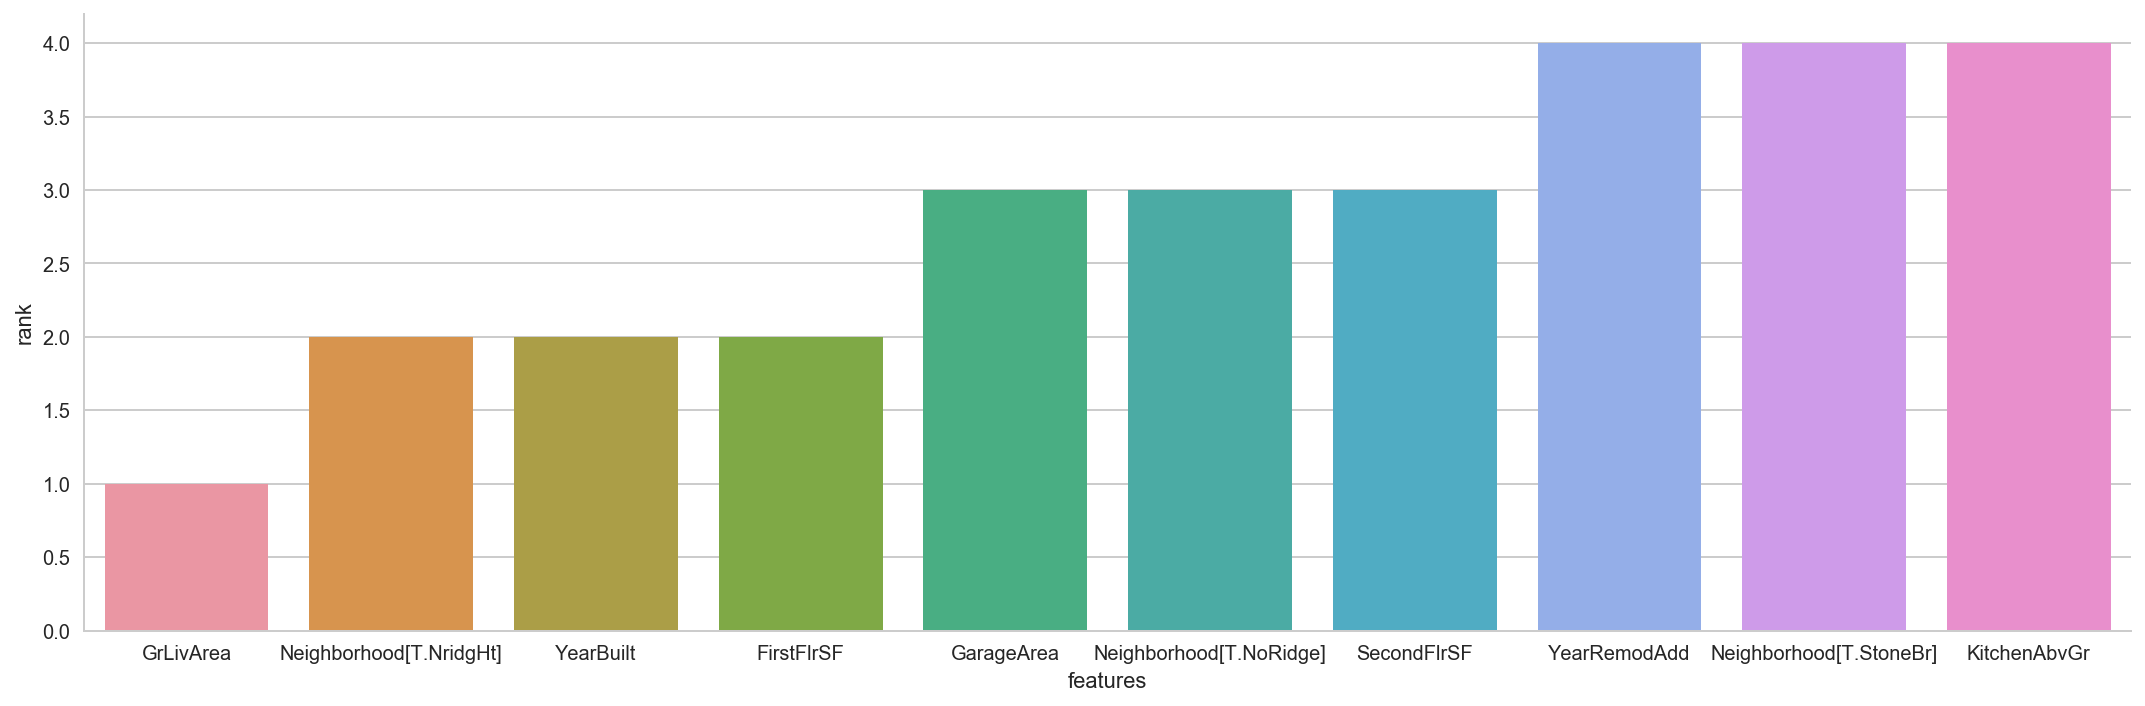

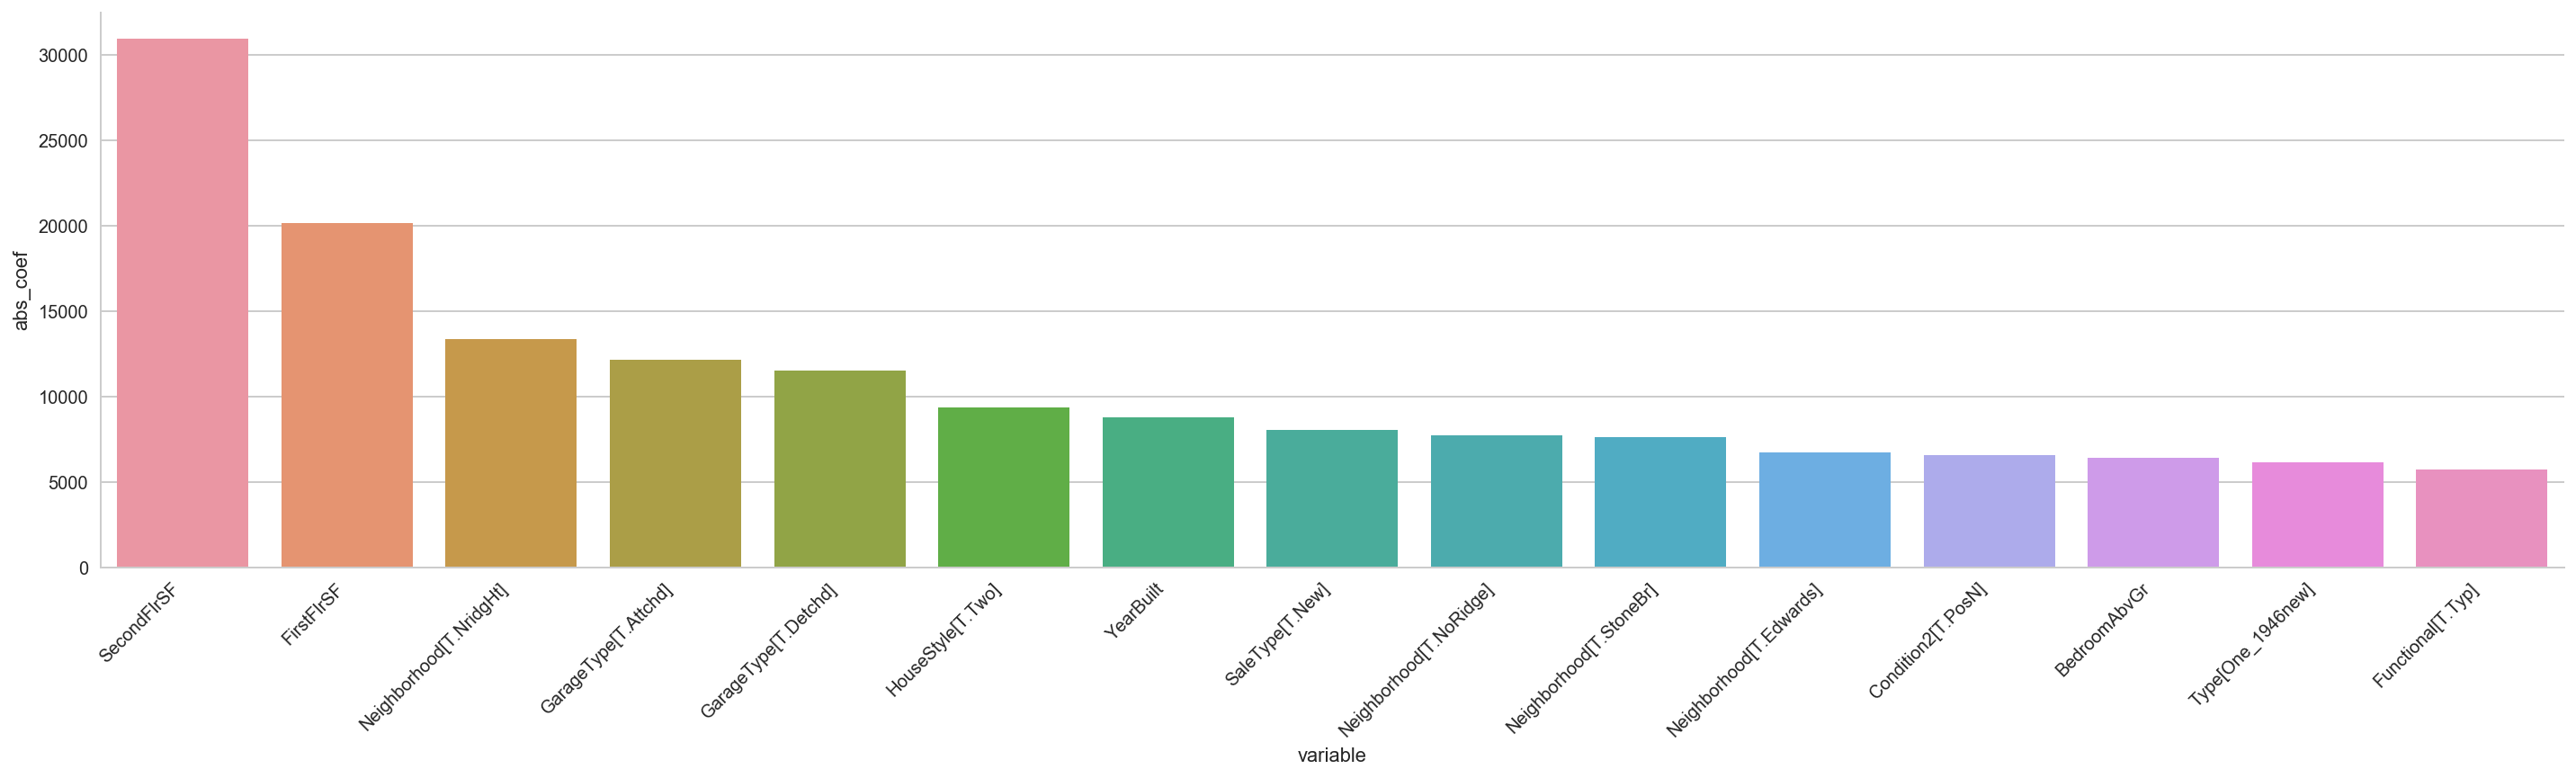

In [46]:
sns.factorplot(x='feature', y='chi2 score', kind='bar',data=kbest.head(15), size=5, aspect=3)
sns.factorplot(x='features', y='rank', kind='bar',data=out_tot.head(10), size=5, aspect=3)
sns.factorplot(x='variable', y='abs_coef', kind='bar',data=lasso_coefs.head(15), size=5, aspect=4).set_xticklabels(rotation=45, horizontalalignment='right')

## Top predictors of price have very much to do with area size and neighbourhood

## Begin training. Linear regression gives me a score of 0.8627, but it is probably overfitted

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linreg2 = LinearRegression()
linreg2.fit(Xs_train, y_train)

print linreg2.score(Xs_test, y_test)
linreg2_scores = cross_val_score(linreg2, X, y, cv=10)

print linreg2_scores
print np.mean(linreg2_scores)

0.862745467962
[ 0.83485362  0.85316324  0.75778091  0.81426929  0.21089998  0.8517789
  0.82900876  0.8037499   0.88195361  0.82710076]
0.766455896155


## Stats model OLS gives a score of 0.859

In [35]:
import statsmodels.api as sm

model = sm.OLS(y,X).fit()


/Users/ezekielkuang/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     55.71
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:43:26   Log-Likelihood:                -16991.
No. Observations:                1450   AIC:                         3.427e+04
Df Residuals:                    1306   BIC:                         3.503e+04
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Type[DualFamily]         -6.764e+05   1.35e+06     -0.500      0.617   -3.33e+06    1.98e+06
Type[Duplex]             -3.345e+05   6.77e+05     -0.494      0.622   -1.66e+06    9.94e+05
Type[MultiLevel_PUD]     -6.848e+05   1.35e+06     -0.506      0.613   -3.34e+06    1.97e+06
Type[One_1945]           -6.653e+05   1.35e+06     -0.491      0.623   -3.32e+06    1.99e+06
Type[One_1946new]        -6.635e+05   1.35e+06     -0.490      0.624   -3.32e+06    1.99e+06
Type[One_PUD]            -6.927e+05   1.35e+06     -0.511      0.609   -3.35e+06    1.96e+06
Type[One_attic]          -6.565e+05   1.36e+06     -0.484      0.628   -3.32e+06       2e+06
Type[Onehalf_fin]        -6.653e+05   1.35e+06     -0.491      0.623   -3.32e+06    1.99e+06
Type[Onehalf_unfin]      -6.779e+05   1.35e+06     -0.500      0.617   -3.34e+06    1.98e+06
Type[Split_Foyer]        -6.696e+05   1.36e+06     -0.494      0.621   -3.33e+06    1.99e+06
Type[Split_Level]        -6.751e+05   1.36e+06     -0.498      0.619   -3.33e+06    1.98e+06
Type[Two_1945old]        -6.614e+05   1.35e+06     -0.488      0.625   -3.32e+06       2e+06
Type[Two_1946new]        -6.787e+05   1.35e+06     -0.501      0.616   -3.34e+06    1.98e+06
Type[Two_PUD]            -6.968e+05   1.35e+06     -0.515      0.607   -3.35e+06    1.96e+06
Type[Twohalf]            -6.879e+05   1.35e+06     -0.508      0.612   -3.34e+06    1.97e+06
MSZoning[T.RH]           -2312.0526   1.25e+04     -0.185      0.853   -2.68e+04    2.21e+04
MSZoning[T.RL]            -778.9372   8775.054     -0.089      0.929    -1.8e+04    1.64e+04
MSZoning[T.RM]            2845.3755   9808.860      0.290      0.772   -1.64e+04    2.21e+04
Street[T.Pave]            3.476e+04   1.89e+04      1.837      0.066   -2352.607    7.19e+04
LotShape[T.IR2]           7460.9274   5559.699      1.342      0.180   -3445.991    1.84e+04
LotShape[T.IR3]          -4.288e+04   1.13e+04     -3.810      0.000    -6.5e+04   -2.08e+04
LotShape[T.Reg]           1667.3536   2174.896      0.767      0.443   -2599.318    5934.025
LandContour[T.HLS]        2.824e+04   6841.189      4.128      0.000    1.48e+04    4.17e+04
LandContour[T.Low]        1.088e+04   8515.711      1.278      0.201   -5821.844    2.76e+04
LandContour[T.Lvl]         1.34e+04   4879.706      2.746      0.006    3826.269     2.3e+04
Utilities[T.NoSeWa]      -6.539e+04    3.8e+04     -1.723      0.085    -1.4e+05    9058.110
LotConfig[T.CulDSac]      1.054e+04   4313.934      2.444      0.015    2078.838     1.9e+04
LotConfig[T.FR2]         -6411.5851   5337.553     -1.201      0.230   -1.69e+04    4059.531
LotConfig[T.FR3]          -2.02e+04   1.71e+04     -1.185      0.236   -5.37e+04    1.33e+04
LotConfig[T.Inside]        867.3463   2330.547      0.372      0.710   -3704.679    5439.372
LandSlope[T.Mo

## Lasso regression gave 0.8627

In [37]:
from sklearn.linear_model import LassoCV, Lasso
lasso_model = Lasso(alpha=1.0)

#optimal_lasso = LassoCV(n_alphas=100, cv=10)
#optimal_lasso.fit(Xs_train, y_train)

lasso_model.fit(Xs_train, y_train)
lasso_guess = lasso_model.predict(Xs_test)

print lasso_model.score(Xs_test, y_test)


0.86267312526


/Users/ezekielkuang/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [38]:

lasso_scores = cross_val_score(lasso_model, X, y, cv=10)
print lasso_scores
print lasso_scores.mean()

[ 0.83580511  0.85436937  0.75698106  0.8153794   0.21136889  0.85262402
  0.83202992  0.80430916  0.88208695  0.82763538]
0.767258925957


In [39]:
lasso_model.coef_.shape

(148,)

In [40]:
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso_model.coef_,
                            'abs_coef':np.abs(lasso_model.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

abs_coef          coef                 variable
127  30958.905529  30958.905529              SecondFlrSF
126  20159.321111  20159.321111               FirstFlrSF
47   13339.789180  13339.789180  Neighborhood[T.NridgHt]
93   12144.319782  12144.319782     GarageType[T.Attchd]
97   11525.147551  11525.147551     GarageType[T.Detchd]
79    9378.195023  -9378.195023        HouseStyle[T.Two]
119   8759.891701   8759.891701                YearBuilt
109   8020.304984   8020.304984          SaleType[T.New]
46    7724.821436   7724.821436  Neighborhood[T.NoRidge]
53    7632.941882   7632.941882  Neighborhood[T.StoneBr]

## Try ridge regression. Score of 0.8627

In [41]:
from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge(alpha=1.0)
ridge.fit(Xs_train, y_train)

ridge_guess_train = ridge.predict(Xs_train)
ridge_guess_test = ridge.predict(Xs_test)

print ridge.score(Xs_test, y_test)

ridge_cv = cross_val_score(ridge, X, y, cv=10)
print ridge_cv
print np.mean(ridge_cv)


0.862698623627
[ 0.84504693  0.86211555  0.75456358  0.8348237   0.39199084  0.85433316
  0.83616792  0.80651727  0.881181    0.83357754]
0.790031748329


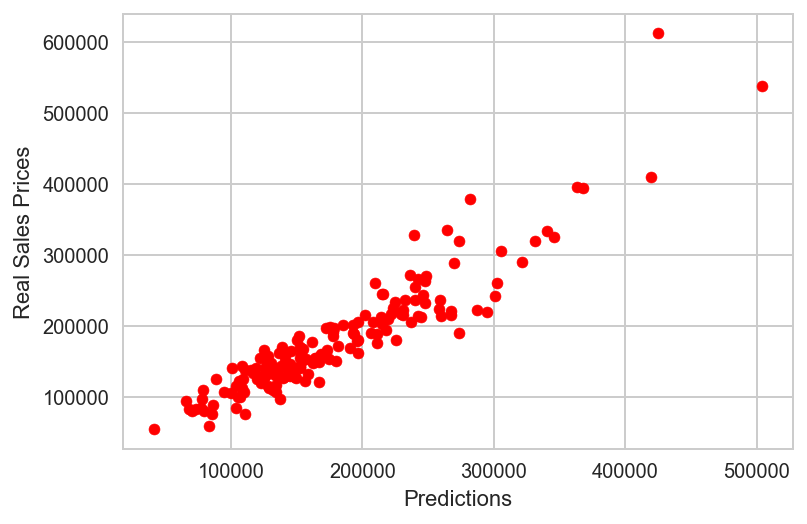

In [42]:
plt.scatter(ridge_guess_test, y_test, s=30, c='r', zorder=10)
plt.xlabel("Predictions")
plt.ylabel("Real Sales Prices")
plt.show()

## Elastic Net did not produce better results (0.8037). Apparently the optimal ENet ratio was 1.0, essentially telling me to use Lasso regression

In [43]:
l1_ratios = np.linspace(0.01, 1.0, 25)

from sklearn.linear_model import ElasticNetCV, ElasticNet

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(Xs_train, y_train)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

/Users/ezekielkuang/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

2423.85115513
1.0


..............................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.0s finished


In [44]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet.fit(X_train, y_train)

enet_scores = enet.score(X_test, y_test)
enet_cv = cross_val_score(enet, X, y, cv=10)

print enet_scores
print enet_cv
print np.mean(enet_cv)

0.803786226604
[ 0.76792871  0.77666592  0.64309369  0.82816271  0.27802834  0.82253798
  0.79444212  0.78783536  0.8143985   0.78386498]
0.729695829253


## 2. Try to determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---
The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property? I will try to regress the residuals against the 'fixed' features.


### Generate new dataframe

In [47]:
ridge_guess_all = np.append(ridge_guess_train, ridge_guess_test)
ridge_guess_all.shape

(1450,)

In [48]:
rga = pd.DataFrame(ridge_guess_all, columns=['Predicted'])
actualpx = pd.DataFrame(y.values, columns=['Actual'])
difference = pd.DataFrame(rga.values - y.values, columns=['Difference'])

residuals = pd.concat([rga, actualpx, difference], axis=1)

residuals.head(10)

Predicted    Actual    Difference
0  139689.203713  120000.0  19689.203713
1  266936.205008  266000.0    936.205008
2  143145.962640  151000.0  -7854.037360
3  196284.117220  185000.0  11284.117220
4  144161.490780  132500.0  11661.490780
5  298673.150943  335000.0 -36326.849057
6  153184.260684  151000.0   2184.260684
7  166450.170153  138887.0  27563.170153
8  217841.608799  195000.0  22841.608799
9   72279.756847  108480.0 -36200.243153

In [49]:
house_new = pd.DataFrame({'OverallQual':house['OverallQual'],
 'OverallCond':house['OverallCond'],
 'RoofStyle':house['RoofStyle'],
 'RoofMatl':house['RoofMatl'],
 'Exterior1st':house['Exterior1st'],
 'Exterior2nd':house['Exterior2nd'],
 'MasVnrType':house['MasVnrType'],
 'ExterQual':house['ExterQual'],
 'ExterCond':house['ExterCond'],
 'BsmtQual':house['BsmtQual'],
 'BsmtCond':house['BsmtCond'],
 'BsmtExposure':house['BsmtExposure'],
 'BsmtFinType1':house['BsmtFinType1'],
 'BsmtFinType2':house['BsmtFinType2'],
 'Heating':house['Heating'],
 'HeatingQC':house['HeatingQC'],
 'CentralAir':house['CentralAir'],
 'Electrical':house['Electrical'],
 'KitchenQual':house['KitchenQual'],
 'FireplaceQu':house['FireplaceQu'],
 'GarageQual':house['GarageQual'],
 'GarageCond':house['GarageCond'],
                         
                         })

In [50]:
residuals['Difference'].shape

(1450,)

In [51]:
house_new['Diff'] = residuals['Difference']

In [52]:
house_new['Diff'].tail()

615     3503.615700
211    -4309.411865
939   -54680.010008
960    -3692.013735
730     2088.795194
Name: Diff, dtype: float64

## Regress 'Difference' column against renovatable features

In [53]:
g = 'Diff ~ '+' + '.join([c for c in house_new.columns if not c == 'Diff']) + "-1"
print g

Diff ~ BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + BsmtQual + CentralAir + Electrical + ExterCond + ExterQual + Exterior1st + Exterior2nd + FireplaceQu + GarageCond + GarageQual + Heating + HeatingQC + KitchenQual + MasVnrType + OverallCond + OverallQual + RoofMatl + RoofStyle-1


In [54]:
import patsy

formula2 = g

y_new, X_new = patsy.dmatrices(formula2, data=house_new, return_type='dataframe')

In [55]:
X_new.head()

BsmtCond[Fa]  BsmtCond[Gd]  BsmtCond[None]  BsmtCond[Po]  BsmtCond[TA]  \
1183           0.0           0.0             0.0           0.0           1.0   
270            0.0           0.0             0.0           0.0           1.0   
831            0.0           0.0             0.0           0.0           1.0   
266            0.0           0.0             0.0           0.0           1.0   
1231           0.0           0.0             0.0           0.0           1.0   

      BsmtExposure[T.Gd]  BsmtExposure[T.Mn]  BsmtExposure[T.No]  \
1183                 0.0                 0.0                 1.0   
270                  0.0                 1.0                 0.0   
831                  0.0                 0.0                 1.0   
266                  0.0                 0.0                 0.0   
1231                 0.0                 0.0                 0.0   

      BsmtExposure[T.None]  BsmtFinType1[T.BLQ]     ...       \
1183                   0.0                  0.0     ...        
270                    0.0                  0.0     ...        
831                    0.0                  0.0     ...        
266                    0.0                  0.0     ...        
1231                   0.0                  0.0     ...        

      RoofMatl[T.Tar&Grv]  RoofMatl[T.WdShake]  RoofMatl[T.WdShngl]  \
1183                  0.0                  0.0                  0.0   
270                   0.0                  0.0                  0.0   
831                   0.0                  0.0                  0.0   
266                   0.0                  0.0                  0.0   
1231                  0.0                  0.0                  0.0   

      RoofStyle[T.Gable]  RoofStyle[T.Gambrel]  RoofStyle[T.Hip]  \
1183                 0.0                   0.0               1.0   
270                  1.0                   0.0               0.0   
831                  1.0                   0.0               0.0   
266                  1.0                   0.0               0.0   
1231                 0.0                   0.0               1.0   

      RoofStyle[T.Mansard]  RoofStyle[T.Shed]  OverallCond  OverallQual  
1183                   0.0                0.0          6.0          5.0  
270                    0.0                0.0          5.0          8.0  
831                    0.0                0.0          5.0          7.0  
266                    0.0                0.0          5.0          6.0  
1231                   0.0                0.0          6.0          5.0  

[5 rows x 111 columns]

In [56]:
ss = StandardScaler()
XS = ss.fit_transform(X_new)


In [57]:
linreg_new = LinearRegression()
linreg_new.fit(XS, y_new)

linreg_cvs = cross_val_score(linreg_new, X_new, y_new, cv=10)
print linreg_new.score(XS, y_new)
print linreg_cvs
print linreg_cvs.mean()

0.109290748658
[ -5.96302588e-03  -1.46853891e-02  -2.38168723e-01  -7.61611765e+20
  -1.73975597e-01  -1.24590092e-01  -4.77899680e+21  -2.01293047e+18
  -1.33142915e-01  -3.96453632e+23]
-4.01996253791e+22


In [58]:
ridge_new = ridge.fit(XS, y_new)

ridge_new.score(XS, y_new)

0.10810854939609325

In [59]:
lasso_new = lasso_model.fit(XS, y_new)

lasso_new.score(XS, y_new)

0.10932413317729726

## Lousy scores all across the board. Looking at the features that matter with lasso:

           Coeff                 Feature
64  38513.756045  Exterior2nd[T.VinylSd]
59  24810.517815  Exterior2nd[T.MetalSd]
57  22277.751191  Exterior2nd[T.HdBoard]
61  22114.656408  Exterior2nd[T.Plywood]
65  20193.559612  Exterior2nd[T.Wd Sdng]
56  17548.212949  Exterior2nd[T.CmentBd]
63  11521.767861   Exterior2nd[T.Stucco]
66  11381.609882  Exterior2nd[T.Wd Shng]
54   6951.319885  Exterior2nd[T.BrkFace]
53   5794.275513  Exterior2nd[T.Brk Cmn]
83   5036.821997         Heating[T.GasW]
58   4943.198090  Exterior2nd[T.ImStucc]
52   3414.528006  Exterior2nd[T.AsphShn]
62   3232.831528    Exterior2nd[T.Stone]
60   2958.858627    Exterior2nd[T.Other]
24   2787.976996          BsmtQual[T.TA]
82   2769.593386         Heating[T.GasA]
14   2304.798679     BsmtFinType1[T.Unf]
22   2182.620516          BsmtQual[T.Gd]
8    2152.445607    BsmtExposure[T.None]


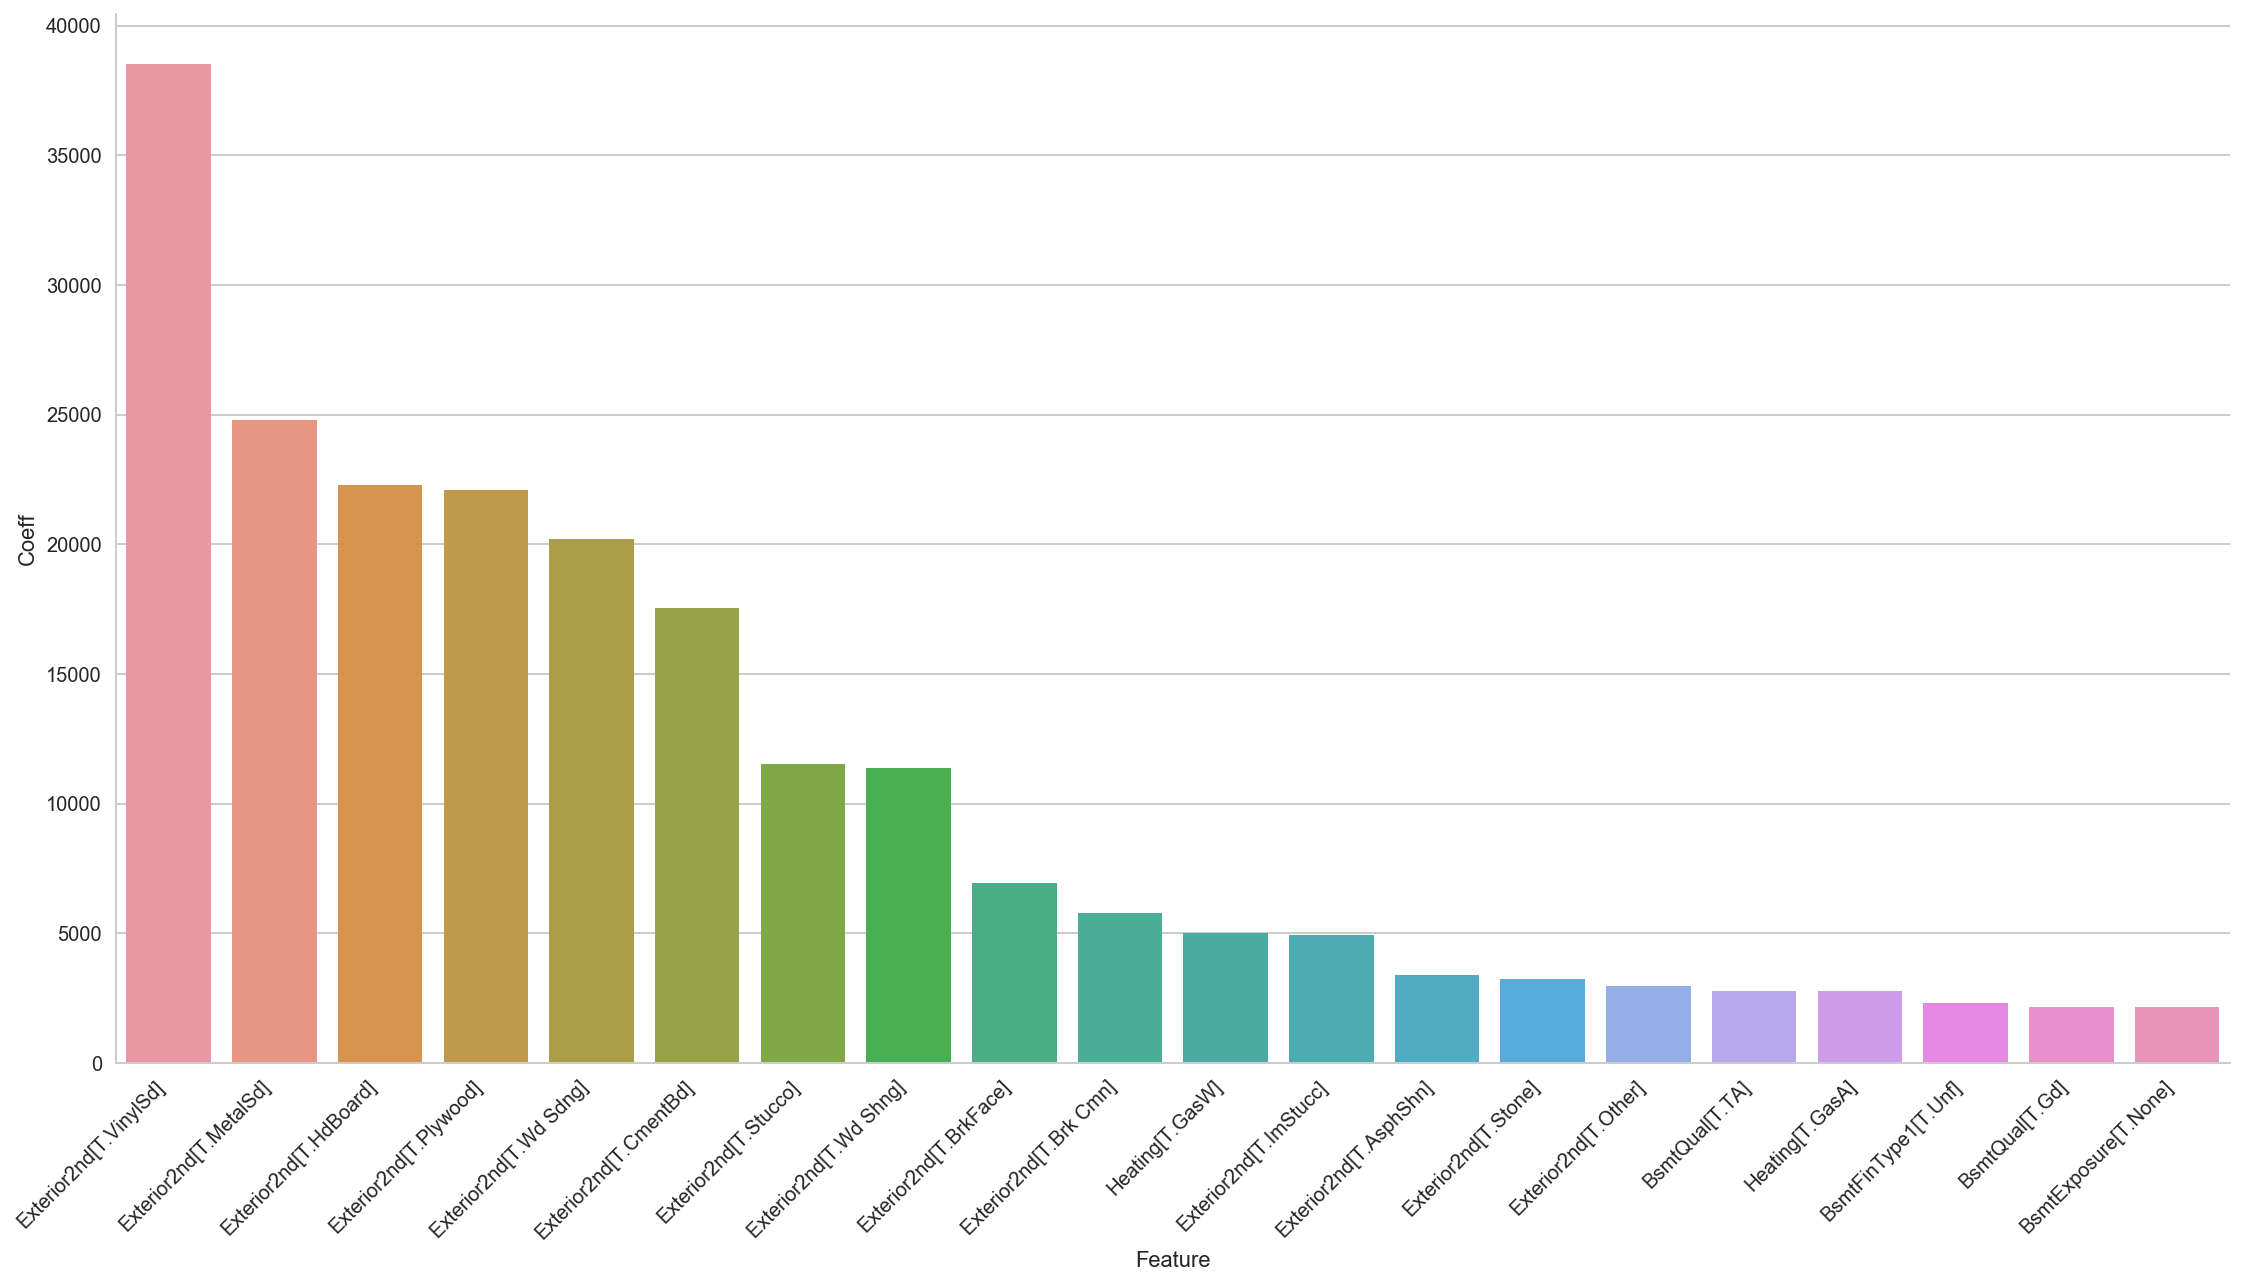

In [60]:
cof_chart = pd.DataFrame({'Feature':X_new.columns,'Coeff':lasso_new.coef_})
cof_chart.sort_values(by='Coeff',ascending=False,inplace=True)
print cof_chart.head(20)
sns.factorplot(x='Feature', y='Coeff', 
               data=cof_chart.head(20), kind='bar', size=8, aspect=2).set_xticklabels(rotation=45, horizontalalignment='right')

### From the above we can infer that among the renovatable features, the ones most likely to be able to explain the variance between actual and predicted price are exterior types and quality of basement. For example, the difference between having Vinyl and Metal exteriors could mean a difference of \$13,703 in house value.




## 3. What property characteristics predict an "abnormal" sale?

---

1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature. Justify your results.


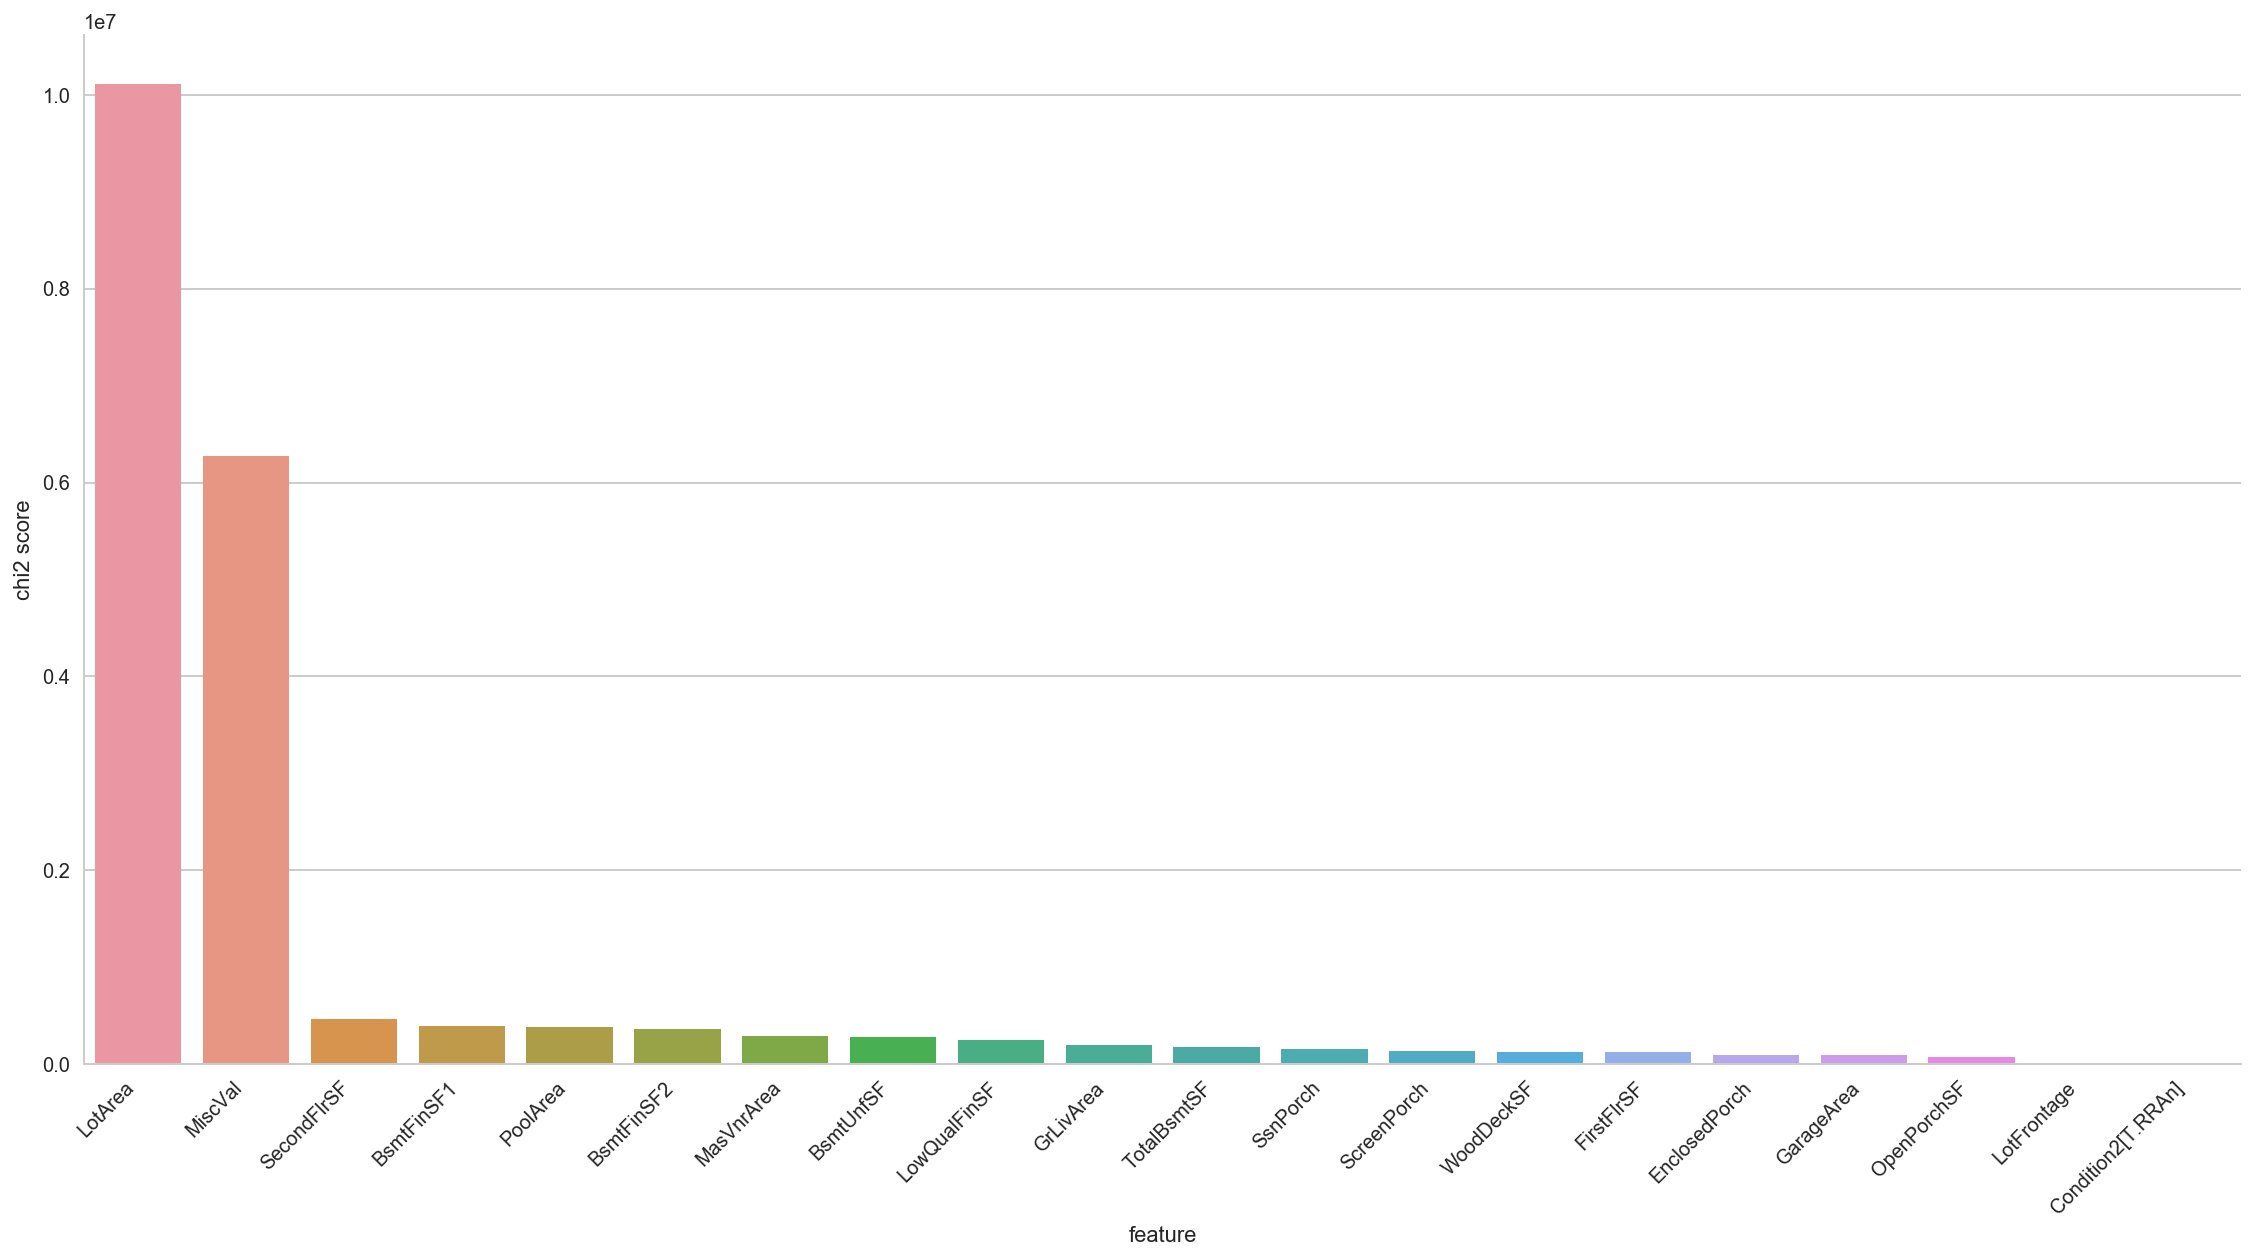

In [61]:
from sklearn.feature_selection import SelectKBest, chi2 

# build the selector
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our entire dataset from Q1
skb_chi2.fit(X, y)

# examine results
kbest_all = pd.DataFrame([list(X.columns), list(skb_chi2.scores_)], 
                     index=['feature','chi2 score']).T.sort_values('chi2 score', ascending=False)
kbest_all

sns.factorplot(x='feature', y='chi2 score', 
               data=kbest_all.head(20), kind='bar', size=8, aspect=2).set_xticklabels(rotation=45, horizontalalignment='right')

In [62]:
house.SaleCondition.value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

## With 96 units, only 6.6% of houses in the dataset are abnormal sales. 
## Baseline = 93.4%

In [77]:
house['SaleCondition'].replace(['AdjLand','Alloca','Family','Normal','Partial'],'OK', inplace=True)

In [78]:
condition_dummy = pd.get_dummies(house['SaleCondition'])

In [79]:
house['Abnorml'] = condition_dummy['Abnorml']

In [80]:
house_ab = house.drop('SaleCondition', axis=1)

In [81]:
h = 'Abnorml ~ '+' + '.join([c for c in house_ab.columns if not c == 'Abnorml']) + "-1"
print h

Abnorml ~ MSZoning + LotFrontage + LotArea + Street + LotShape + LandContour + Utilities + LotConfig + LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + MasVnrArea + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + CentralAir + Electrical + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + FireplaceQu + GarageType + GarageYrBlt + GarageFinish + GarageCars + GarageArea + GarageQual + GarageCond + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + SsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + SaleType + SalePrice + Type-1


In [82]:
import patsy

formula3 = h

y_ab, X_ab = patsy.dmatrices(formula3, data=house_ab, return_type='dataframe')

In [83]:
ss = StandardScaler()
Xab = ss.fit_transform(X_ab)

In [84]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

X_tr, X_te, y_tr, y_te = train_test_split(X_ab, y_ab, train_size=0.7, random_state=15)

logr = LogisticRegression()
logr.fit(X_tr, y_tr)

print logr.score(X_te, y_te)

logr_pred = logr.predict(Xab)

0.938073394495


## Score performs slightly better than baseline, but F-1 score below is only 0.67

In [85]:
from sklearn.metrics import classification_report, f1_score
print classification_report(y_ab, logr_pred)
print f1_score(y_ab, logr_pred, average=None)

             precision    recall  f1-score   support

        0.0       0.97      0.55      0.70      1354
        1.0       0.11      0.76      0.19        96

avg / total       0.91      0.57      0.67      1450

[ 0.7046096   0.18863049]


In [86]:
# balancing the dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb

logpipe = make_pipeline_imb(
    RandomUnderSampler(),
    LogisticRegression()
)

logpipe.fit(X_tr, y_tr)
logpipe_pred = logpipe.predict(X_te)
logpipe_pred_proba = logpipe.predict_proba(X_te)
logr = logpipe.score(X_te, y_te)
print logr
print classification_report(y_te, logpipe_pred)


0.603211009174
             precision    recall  f1-score   support

        0.0       0.95      0.61      0.74       411
        1.0       0.07      0.48      0.12        25

avg / total       0.90      0.60      0.71       436



Slight improvement in f1-score, but recall has suffered! 